## This script contains the following points:
#### 0. Import libraries
#### 1. Import data
#### 2. Pick out variables from your data set suitable for your exploratory visual analysis
#### 3. Create a correlation matrix heatmap
#### 4. Create a scatterplot (or plots) for the variables with the strongest correlations
#### 5. Create a pair plot of the entire data set
#### 6. Create a categorical plot and interpret the results
#### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far
#### 8. Define any hypotheses that you can at this point
#### 9. Save changes

#### 0. Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#### 1. Import data

In [2]:
#Import Data
path = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design'

df = pd.read_csv(os.path.join(path, '2. Exploring Relationships','gun_violence_data_clean.csv'))
df

Unnamed: 0  incident_id        date day_of_week  day  month  year  \
0                0       461105  2013-01-01     Tuesday    1      1  2013   
1                1       460726  2013-01-01     Tuesday    1      1  2013   
2                2       478855  2013-01-01     Tuesday    1      1  2013   
3                3       478925  2013-01-05    Saturday    5      1  2013   
4                4       478959  2013-01-07      Monday    7      1  2013   
...            ...          ...         ...         ...  ...    ...   ...   
239672      239672      1083142  2018-03-31    Saturday   31      3  2018   
239673      239673      1083139  2018-03-31    Saturday   31      3  2018   
239674      239674      1083151  2018-03-31    Saturday   31      3  2018   
239675      239675      1082514  2018-03-31    Saturday   31      3  2018   
239676      239676      1081940  2018-03-31    Saturday   31      3  2018   

                                          address city_or_county  \
0       1506 Versailles Avenue and Coursin Street     Mckeesport   
1                    13500 block of Cerise Avenue      Hawthorne   
2                           1776 East 28th Street         Lorain   
3                16000 block of East Ithaca Place         Aurora   
4                       307 Mourning Dove Terrace     Greensboro   
...                                           ...            ...   
239672         North Riceland Road and Highway 90          Rayne   
239673                             247 Keyser Ave   Natchitoches   
239674                  1300 block of Cook Street         Gretna   
239675                     12630 Ashford Point Dr        Houston   
239676                           434 Skowhegan Rd   Norridgewock   

                 state  ...  n_male  n_female  n_victim  n_suspect  \
0         Pennsylvania  ...       3         1         4          1   
1           California  ...       1         0         4          1   
2                 Ohio  ...       5         0         3          2   
3             Colorado  ...       3         1         3          1   
4       North Carolina  ...       2         2         3          1   
...                ...  ...     ...       ...       ...        ...   
239672       Louisiana  ...       0         1         0          1   
239673       Louisiana  ...       2         0         1          1   
239674       Louisiana  ...       1         0         1          0   
239675           Texas  ...       1         0         1          0   
239676           Maine  ...       1         1         1          1   

               location_description  latitude  longitude  \
0                           Unknown   40.3467   -79.8559   
1                           Unknown   33.9090  -118.3330   
2                       Cotton Club   41.4455   -82.1377   
3                           Unknown   39.6518  -104.8020   
4                           Unknown   36.1140   -79.9569   
...                             ...       ...        ...   
239672                      Unknown       NaN        NaN   
239673                    Shop Rite   31.7537   -93.0836   
239674                      Unknown   29.9239   -90.0442   
239675  Vanderbilt Court apartments   29.7201   -95.6110   
239676                      Unknown   44.7293   -69.7691   

        state_house_district  state_senate_district  congressional_district  
0                        NaN                    NaN                    14.0  
1                       62.0                   35.0                    43.0  
2                       56.0                   13.0                     9.0  
3                       40.0                   28.0                     6.0  
4                       62.0                   27.0                     6.0  
...                      ...                    ...                     ...  
239672                   NaN                    NaN                     NaN  
239673                  23.0                   31.0                     4.0  
23

In [3]:
#Drop Unnamed: 0 column
df = df.drop(columns=['Unnamed: 0'])
df.head()

incident_id        date day_of_week  day  month  year  \
0       461105  2013-01-01     Tuesday    1      1  2013   
1       460726  2013-01-01     Tuesday    1      1  2013   
2       478855  2013-01-01     Tuesday    1      1  2013   
3       478925  2013-01-05    Saturday    5      1  2013   
4       478959  2013-01-07      Monday    7      1  2013   

                                     address city_or_county           state  \
0  1506 Versailles Avenue and Coursin Street     Mckeesport    Pennsylvania   
1               13500 block of Cerise Avenue      Hawthorne      California   
2                      1776 East 28th Street         Lorain            Ohio   
3           16000 block of East Ithaca Place         Aurora        Colorado   
4                  307 Mourning Dove Terrace     Greensboro  North Carolina   

   n_participants  ...  n_male  n_female  n_victim  n_suspect  \
0               5  ...       3         1         4          1   
1               4  ...       1         0         4          1   
2               5  ...       5         0         3          2   
3               4  ...       3         1         3          1   
4               4  ...       2         2         3          1   

   location_description  latitude  longitude  state_house_district  \
0               Unknown   40.3467   -79.8559                   NaN   
1               Unknown   33.9090  -118.3330                  62.0   
2           Cotton Club   41.4455   -82.1377                  56.0   
3               Unknown   39.6518  -104.8020                  40.0   
4               Unknown   36.1140   -79.9569                  62.0   

   state_senate_district  congressional_district  
0                    NaN                    14.0  
1                   35.0                    43.0  
2                   13.0                     9.0  
3                   28.0                     6.0  
4                   27.0                     6.0  

[5 rows x 26 columns]

In [4]:
df.info()

## -> no need to do this again
## -> incident_id, day, month and year should be object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   incident_id             239677 non-null  int64  
 1   date                    239677 non-null  object 
 2   day_of_week             239677 non-null  object 
 3   day                     239677 non-null  int64  
 4   month                   239677 non-null  int64  
 5   year                    239677 non-null  int64  
 6   address                 239677 non-null  object 
 7   city_or_county          239677 non-null  object 
 8   state                   239677 non-null  object 
 9   n_participants          239677 non-null  int64  
 10  n_guns_involved         140226 non-null  float64
 11  n_killed                239677 non-null  int64  
 12  n_injured               239677 non-null  int64  
 13  n_adult                 239677 non-null  int64  
 14  n_teen              

#### 2. Pick out variables from your data set suitable for your exploratory visual analysis

In [5]:
df_subset = df[['day', 'month', 'n_participants', 'n_guns_involved', 'n_killed', 'n_injured', 'n_adult', 'n_teen', 'n_child', 'n_male', 'n_female', 'n_victim', 'n_suspect', 'longitude', 'latitude', 'state_house_district', 'state_senate_district', 'congressional_district']]
df_subset.head()

day  month  n_participants  n_guns_involved  n_killed  n_injured  n_adult  \
0    1      1               5              NaN         0          4        5   
1    1      1               4              NaN         1          3        4   
2    1      1               5              2.0         1          3        5   
3    5      1               4              NaN         4          0        4   
4    7      1               4              2.0         2          2        3   

   n_teen  n_child  n_male  n_female  n_victim  n_suspect  longitude  \
0       0        0       3         1         4          1   -79.8559   
1       0        0       1         0         4          1  -118.3330   
2       0        0       5         0         3          2   -82.1377   
3       0        0       3         1         3          1  -104.8020   
4       1        0       2         2         3          1   -79.9569   

   latitude  state_house_district  state_senate_district  \
0   40.3467                   NaN                    NaN   
1   33.9090                  62.0                   35.0   
2   41.4455                  56.0                   13.0   
3   39.6518                  40.0                   28.0   
4   36.1140                  62.0                   27.0   

   congressional_district  
0                    14.0  
1                    43.0  
2                     9.0  
3                     6.0  
4                     6.0

#### 3. Create a correlation matrix heatmap

In [6]:
df_subset.corr()

day     month  n_participants  n_guns_involved  \
day                     1.000000  0.004923       -0.001893        -0.001948   
month                   0.004923  1.000000        0.023717        -0.000299   
n_participants         -0.001893  0.023717        1.000000         0.015281   
n_guns_involved        -0.001948 -0.000299        0.015281         1.000000   
n_killed               -0.000542  0.002522        0.249726        -0.028200   
n_injured               0.002767  0.017748        0.396879        -0.038843   
n_adult                -0.000588 -0.010836        0.767103         0.017489   
n_teen                  0.003033 -0.001560        0.226374        -0.005606   
n_child                -0.002529 -0.002025        0.136732        -0.006035   
n_male                  0.000569  0.009933        0.788307         0.013739   
n_female                0.002857 -0.001236        0.372183        -0.001216   
n_victim                0.002392  0.024234        0.607039        -0.048980   
n_suspect               0.000421 -0.010812        0.693358         0.063704   
longitude               0.004493  0.006517       -0.003751        -0.016107   
latitude                0.005111  0.015401       -0.057076        -0.001341   
state_house_district   -0.004278  0.006871        0.018978        -0.003324   
state_senate_district  -0.001615  0.002435       -0.016544         0.004247   
congressional_district  0.000829 -0.013135        0.011615         0.021249   

                        n_killed  n_injured   n_adult    n_teen   n_child  \
day                    -0.000542   0.002767 -0.000588  0.003033 -0.002529   
month                   0.002522   0.017748 -0.010836 -0.001560 -0.002025   
n_participants          0.249726   0.396879  0.767103  0.226374  0.136732   
n_guns_involved        -0.028200  -0.038843  0.017489 -0.005606 -0.006035   
n_killed                1.000000  -0.125425  0.281437  0.025190  0.069948   
n_injured              -0.125425   1.000000  0.286327  0.105779  0.060570   
n_adult                 0.281437   0.286327  1.000000 -0.096737  0.010233   
n_teen                  0.025190   0.105779 -0.096737  1.000000  0.013264   
n_child                 0.069948   0.060570  0.010233  0.013264  1.000000   
n_male                  0.207306   0.271211  0.735148  0.190798  0.058089   
n_female                0.203497   0.165591  0.359904  0.072816  0.156745   
n_victim                0.373827   0.691518  0.505240  0.128965  0.188484   
n_suspect              -0.015834  -0.102809  0.569323  0.181988  0.018430   
longitude              -0.062149   0.036962  0.004110  0.006399 -0.005128   
latitude               -0.080078  -0.011379 -0.048084 -0.005534 -0.019203   
state_house_district   -0.006015  -0.030355  0.013933 -0.000917  0.004518   
state_senate_district  -0.010650  -0.044294 -0.011174 -0.006242 -0.006866   
congressional_district  0.055545  -0.007636  0.017831 -0.004075 -0.003952   

                          n_male  n_female  n_victim  n_suspect  longitude  \
day                     0.000569  0.002857  0.002392   0.000421   0.004493   
month                   0.009933 -0.001236  0.024234  -0.010812   0.006517   
n_participants          0.788307  0.372183  0.607039   0.693358  -0.003751   
n_guns_involved         0.013739 -0.001216 -0.048980   0.063704  -0.016107   
n_killed                0.207306  0.203497  0.373827  -0.015834  -0.062149   
n_injured               0.271211  0.165591  0.691518  -0.102809   0.036962   
n_adult                 0.735148  0.359904  0.505240   0.569323   0.004110   
n_teen                  0.190798  0.072816  0.128965   0.181988   0.006399   
n_child                 0.058089  0.156745  0.188484   0.018430  -0.005128   
n_male                  1.000000  0.032706  0.441798   0.660859   0.002713   
n_female                0.032706  1.000000  0.346855   0.189840  -0.015096   
n_victim                0.441798  0.346855  1.000000  -0.052203   0.012529   
n_suspect               0.660859  0.189840 -0.052

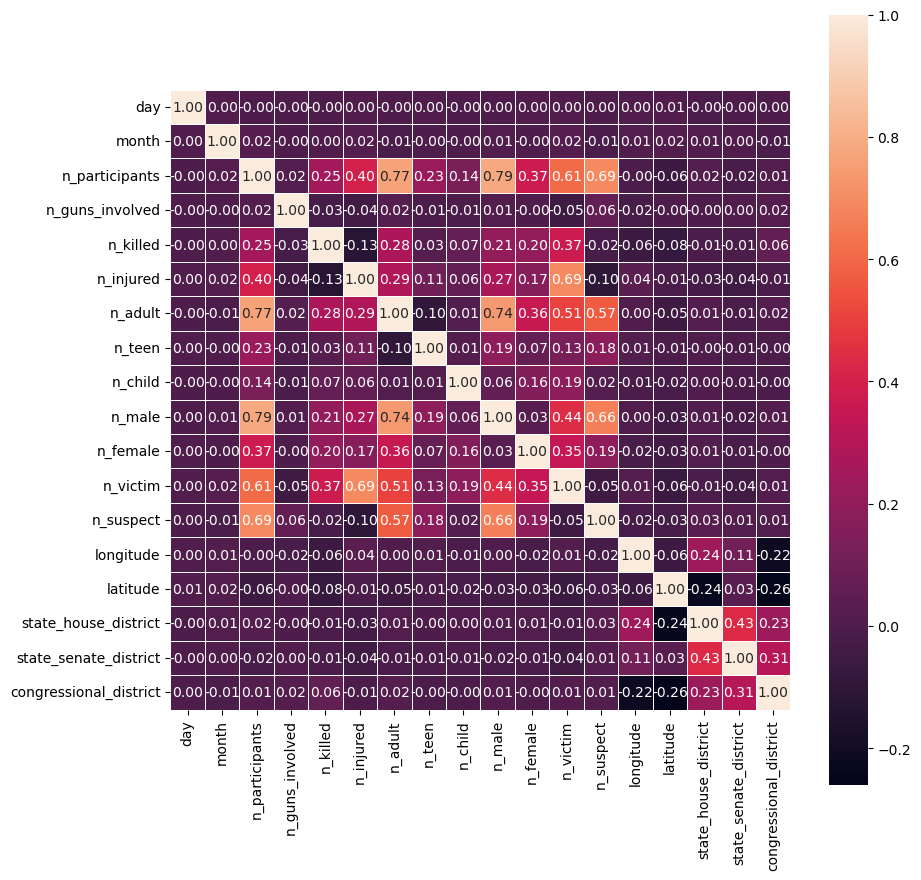

In [7]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the matplotlib correlation matrix and the subplots
heatmap = sns.heatmap(df_subset.corr(), annot = True, fmt=".2f", linewidths=.5, ax = ax)

# Adjust the aspect ratio of the heatmap
ax.set_aspect("equal")

In [9]:
path2 = r'C:\Users\eog87\Desktop\Data Analytics\2. Data Immersion\6. Advanced Analytics N Dashboard Design\7. Creating Data Dashboards\Github'
heatmap.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'heatmap.png'))

###### The heatmap shows the strongest positive correlations are between n_male and n_participants and between n_adult and n_participants

#### 4. Create a scatterplot (or plots) for the variables with the strongest correlations

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


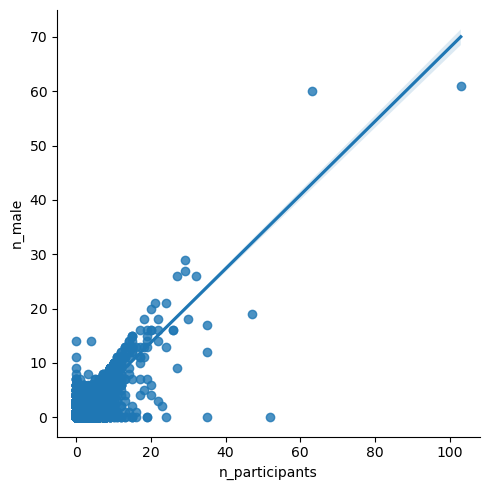

In [10]:
# Create scatterplot for the "n_participants" and "n_male" columns
scatterplo1 = sns.lmplot(x = 'n_participants', y = 'n_male', data = df_subset)

## -> top points and some on the right could be taken out since they are outliers

In [12]:
scatterplo1.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'scatterplo1.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


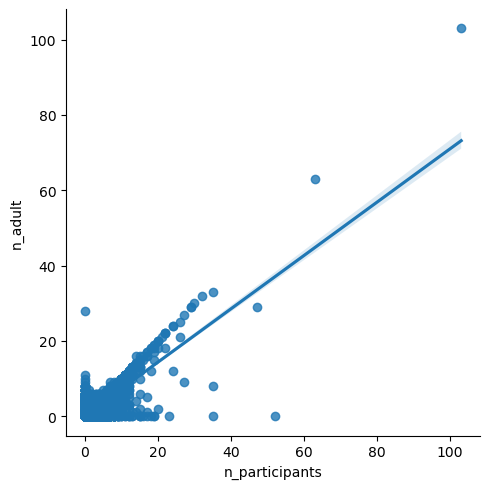

In [13]:
# Create scatterplot for the "n_participants" and "n_male" columns
scatterplot2 = sns.lmplot(x = 'n_participants', y = 'n_adult', data = df_subset)

In [14]:
scatterplot2.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'scatterplo2.png'))

###### The scatterplots does show a strong correlation the variables, with quite a bit outliers though

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


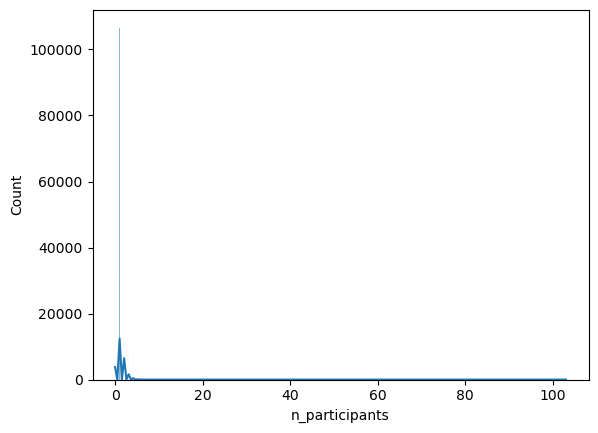

In [15]:
#Checking Distribution of n_participants
hist1 = sns.histplot(df_subset['n_participants'], kde = True)

In [16]:
hist1.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist1.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


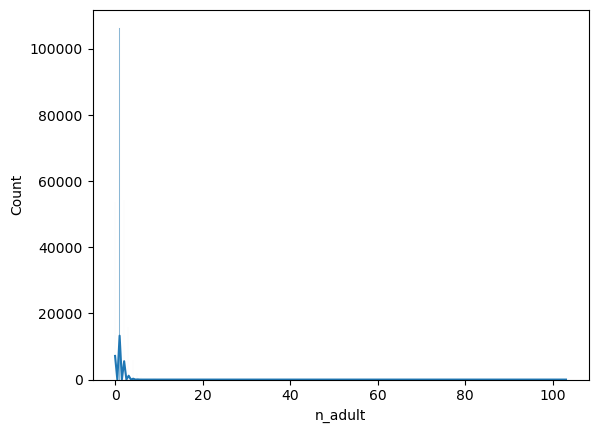

In [17]:
#Checking Distribution of n_adult
hist2 = sns.histplot(df_subset['n_adult'], kde = True)

In [18]:
hist2.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist2.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


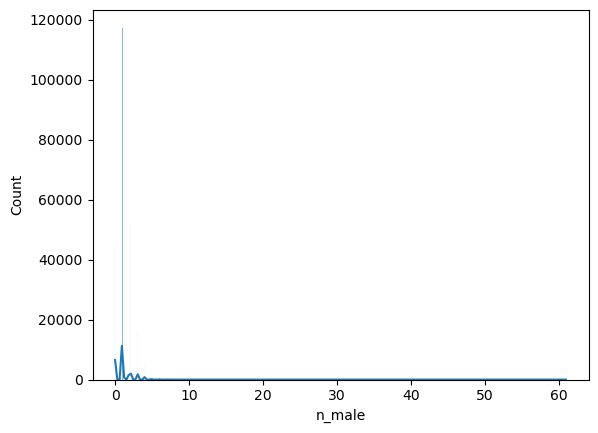

In [19]:
#Checking Distribution of n_male
hist3 = sns.histplot(df_subset['n_male'], kde = True)

In [20]:
hist3.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist3.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


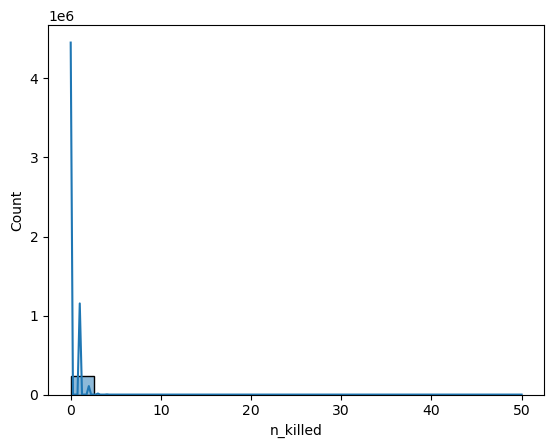

In [21]:
#Checking Distribution of n_killed
hist4 = sns.histplot(df_subset['n_killed'], kde = True)

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='n_injured', ylabel='Count'>

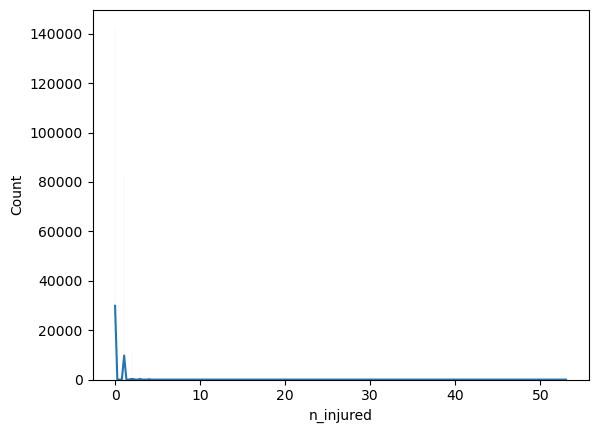

In [24]:
#Checking Distribution of n_injured
sns.histplot(df_subset['n_injured'], kde = True)

In [22]:
hist4.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist4.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


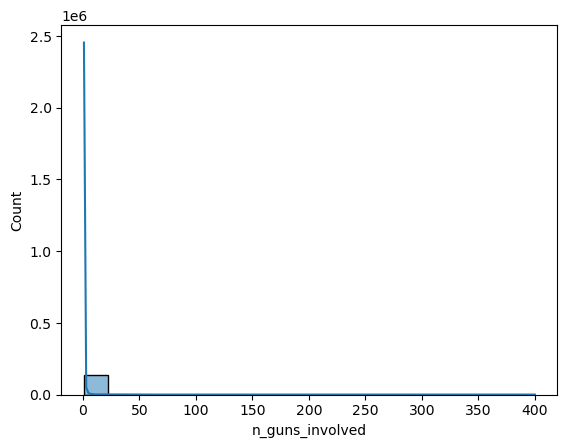

In [23]:
#Checking Distribution of n_guns_involved
hist5 = sns.histplot(df_subset['n_guns_involved'], kde = True)

In [24]:
hist5.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'hist5.png'))

In [26]:
# Outlier analysis
df_subset['n_participants'].describe()

## -> the max here is giving us outliers too that should be removed

count    239677.000000
mean          1.555064
std           1.242176
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         103.000000
Name: n_participants, dtype: float64

In [27]:
# Outlier analysis
df_subset['n_adult'].describe()

## -> the max here is giving us outliers too that should be removed

count    239677.000000
mean          1.278533
std           1.147596
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         103.000000
Name: n_adult, dtype: float64

In [28]:
# Outlier analysis
df_subset['n_male'].describe()

## -> the max here is giving us outliers too that should be removed

count    239677.000000
mean          1.289615
std           1.067821
min           0.000000
25%           1.000000
50%           1.000000
75%           2.000000
max          61.000000
Name: n_male, dtype: float64

In [16]:
# Outlier analysis
df_subset['n_killed'].describe()

## -> the max here is giving us outliers too that should be removed

count    239677.000000
mean          0.252290
std           0.521779
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          50.000000
Name: n_killed, dtype: float64

In [17]:
# Outlier analysis
df_subset['n_injured'].describe()

## -> the max here is giving us outliers too that should be removed

count    239677.000000
mean          0.494007
std           0.729952
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          53.000000
Name: n_injured, dtype: float64

In [18]:
# Outlier analysis
df_subset['n_guns_involved'].describe()

## -> the max here is giving us outliers too that should be removed

count    140226.000000
mean          1.372442
std           4.678202
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         400.000000
Name: n_guns_involved, dtype: float64

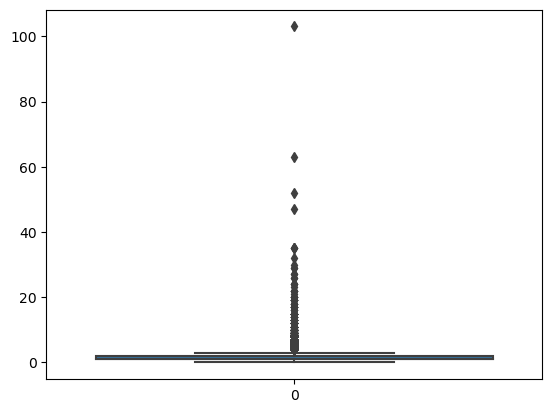

In [25]:
whisk1 = sns.boxplot(df_subset['n_participants'])

In [26]:
whisk1.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk1.png'))

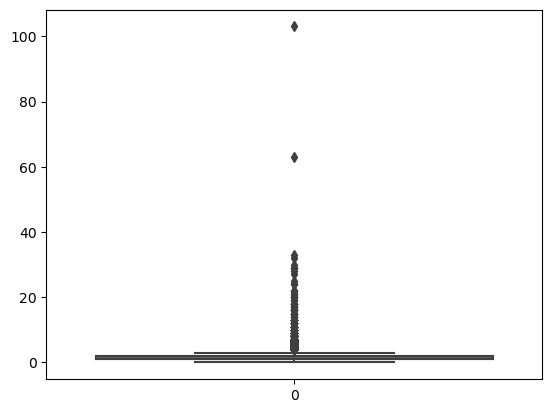

In [27]:
whisk2 = sns.boxplot(df_subset['n_adult'])

In [28]:
whisk2.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk2.png'))

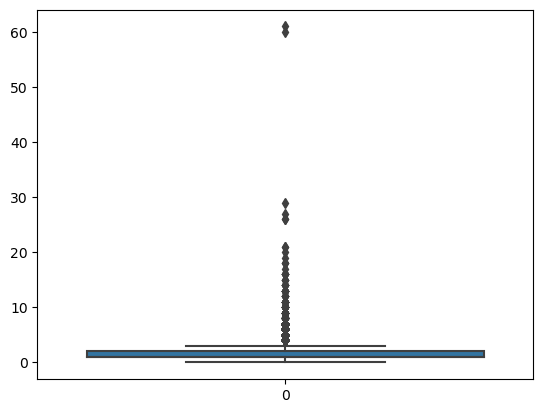

In [29]:
whisk3 = sns.boxplot(df_subset['n_male'])

In [ ]:
whisk3.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk3.png'))

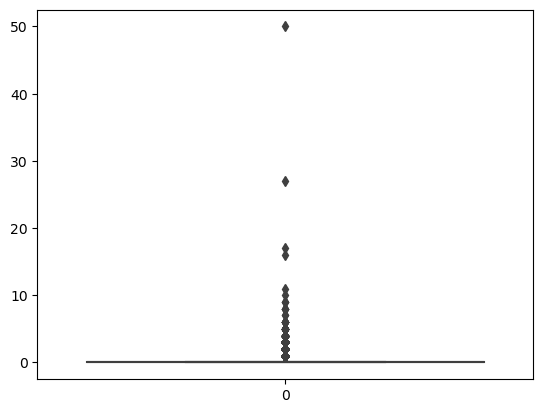

In [31]:
whisk4 = sns.boxplot(df_subset['n_killed'])

In [32]:
whisk4.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk4.png'))

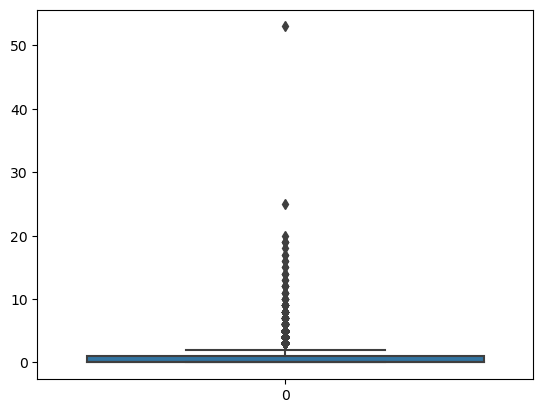

In [33]:
whisk5 = sns.boxplot(df_subset['n_injured'])

In [34]:
whisk5.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk5.png'))

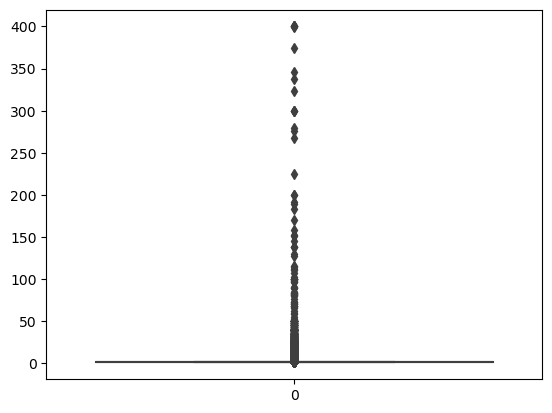

In [35]:
whisk6 = sns.boxplot(df_subset['n_guns_involved'])

In [36]:
whisk6.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'whisk6.png'))

In [33]:
#IQR - Calculating upper and lower limits
Q1_n_participants = df_subset['n_participants'].quantile(0.25)
Q3_n_participants = df_subset['n_participants'].quantile(0.75)
IQR_n_participants = Q3_n_participants - Q1_n_participants
lower_n_participants = Q1_n_participants - 1.5*IQR_n_participants
upper_n_participants = Q3_n_participants + 1.5*IQR_n_participants

In [34]:
print(IQR_n_participants)
print(lower_n_participants)
print(upper_n_participants)

1.0
-0.5
3.5


In [35]:
#IQR - Calculating upper and lower limits
Q1_n_adult = df_subset['n_adult'].quantile(0.25)
Q3_n_adult = df_subset['n_adult'].quantile(0.75)
IQR_n_adult = Q3_n_adult - Q1_n_adult
lower_n_adult = Q1_n_adult - 1.5*IQR_n_adult
upper_n_adult = Q3_n_adult + 1.5*IQR_n_adult

In [36]:
print(IQR_n_adult)
print(lower_n_adult)
print(upper_n_adult)

1.0
-0.5
3.5


In [37]:
#IQR - Calculating upper and lower limits
Q1_n_male = df_subset['n_male'].quantile(0.25)
Q3_n_male = df_subset['n_male'].quantile(0.75)
IQR_n_male = Q3_n_male - Q1_n_male
lower_n_male = Q1_n_male - 1.5*IQR_n_male
upper_n_male = Q3_n_male + 1.5*IQR_n_male

In [38]:
print(IQR_n_male)
print(lower_n_male)
print(upper_n_male)

1.0
-0.5
3.5


In [39]:
#IQR - Calculating upper and lower limits
Q1_n_killed = df_subset['n_killed'].quantile(0.25)
Q3_n_killed = df_subset['n_killed'].quantile(0.75)
IQR_n_killed = Q3_n_killed - Q1_n_killed
lower_n_killed = Q1_n_killed - 1.5*IQR_n_killed
upper_n_killed = Q3_n_killed + 1.5*IQR_n_killed

In [40]:
print(IQR_n_killed)
print(lower_n_killed)
print(upper_n_killed)

0.0
0.0
0.0


In [41]:
#IQR - Calculating upper and lower limits
Q1_n_injured = df_subset['n_injured'].quantile(0.25)
Q3_n_injured = df_subset['n_injured'].quantile(0.75)
IQR_n_injured = Q3_n_injured - Q1_n_injured
lower_n_injured = Q1_n_injured - 1.5*IQR_n_injured
upper_n_injured = Q3_n_injured + 1.5*IQR_n_injured

In [42]:
print(IQR_n_injured)
print(lower_n_injured)
print(upper_n_injured)

1.0
-1.5
2.5


In [43]:
#IQR - Calculating upper and lower limits
Q1_n_guns_involved = df_subset['n_guns_involved'].quantile(0.25)
Q3_n_guns_involved = df_subset['n_guns_involved'].quantile(0.75)
IQR_n_guns_involved = Q3_n_guns_involved - Q1_n_guns_involved
lower_n_guns_involved = Q1_n_guns_involved - 1.5*IQR_n_guns_involved
upper_n_guns_involved = Q3_n_guns_involved + 1.5*IQR_n_guns_involved

In [44]:
print(IQR_n_guns_involved)
print(lower_n_guns_involved)
print(upper_n_guns_involved)

0.0
1.0
1.0


#### 5. Create a pair plot of the entire data set

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

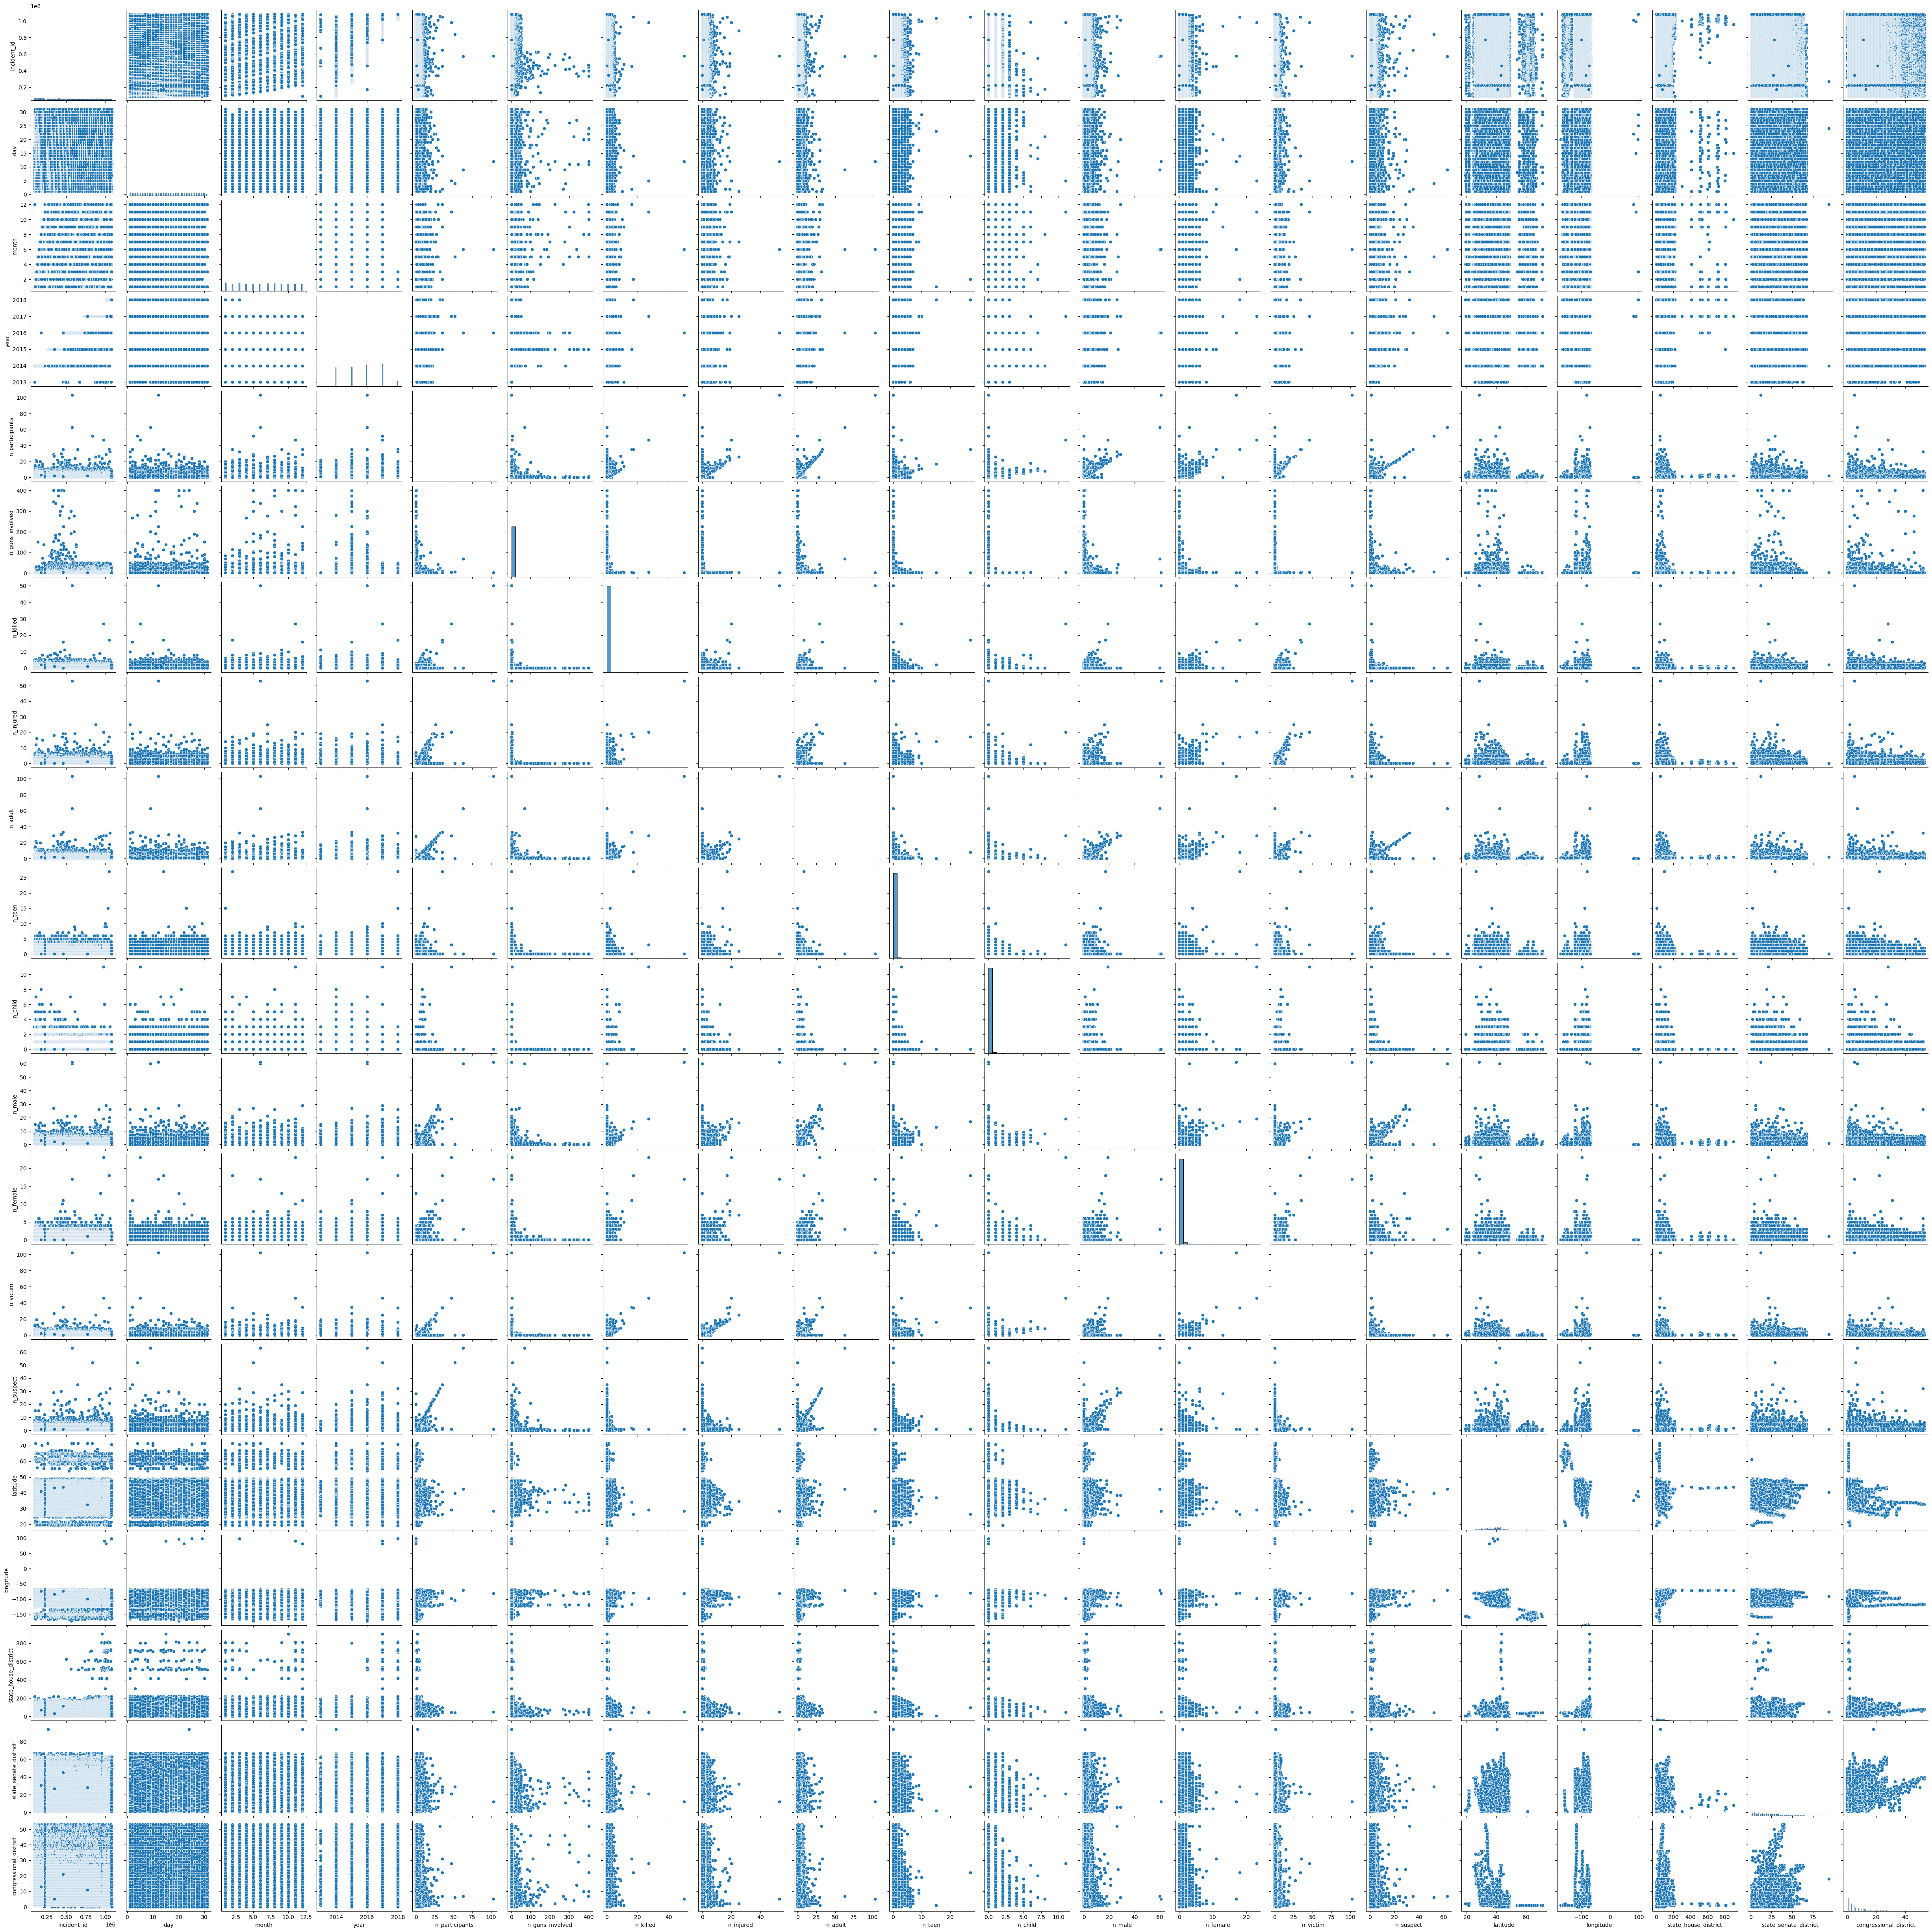

In [45]:
pairplot = sns.pairplot(df)

In [47]:
pairplot.figure.savefig(os.path.join(path, '2. Exploring Relationships','pariplot.png'))

###### If we see all these plots, as we suspected n_participants and n_adult are the ones that have the highest relationship

#### 6. Create a categorical plot and interpret the results

In [48]:
#Create categories
df.loc[df['n_killed'] < 2, 'kills_flag'] = 'single kill'
df.loc[(df['n_killed'] >= 2) & (df['n_killed'] < 7), 'kills_flag'] = 'low kills'
df.loc[(df['n_killed'] >= 7) & (df['n_killed'] < 15), 'kills_flag'] = 'medium kills'
df.loc[df['n_killed'] >= 16, 'kills_flag'] = 'high kilss'

df.loc[df['n_injured'] < 2, 'injured_flag'] = 'single injured'
df.loc[(df['n_injured'] >= 2) & (df['n_injured'] < 7), 'injured_flag'] = 'low injured'
df.loc[(df['n_injured'] >= 7) & (df['n_injured'] < 16), 'injured_flag'] = 'medium injured'
df.loc[df['n_injured'] >= 16, 'injured_flag'] = 'high injured'

df.loc[df['n_guns_involved'] < 2, 'guns_flag'] = 'single gun'
df.loc[(df['n_guns_involved'] >= 2) & (df['n_guns_involved'] < 7), 'guns_flag'] = 'low guns'
df.loc[(df['n_guns_involved'] >= 7) & (df['n_guns_involved'] < 16), 'guns_flag'] = 'medium guns'
df.loc[df['n_guns_involved'] >= 16, 'guns_flag'] = 'high guns'

In [49]:
df['kills_flag'].value_counts(dropna = False)
# The 61 nan values are the null cells 

kills_flag
single kill     234271
low kills         5390
medium kills        12
high kilss           4
Name: count, dtype: int64

In [50]:
df['injured_flag'].value_counts(dropna = False)

injured_flag
single injured    224473
low injured        15089
medium injured       104
high injured          11
Name: count, dtype: int64

In [51]:
df['guns_flag'].value_counts(dropna = False)

guns_flag
single gun     127548
nan             99451
low guns        11089
medium guns       917
high guns         672
Name: count, dtype: int64

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


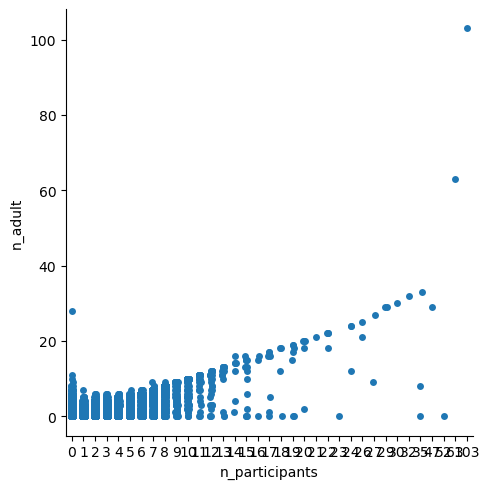

In [37]:
dist1 = sns.catplot(x = 'n_participants', y = 'n_adult', data = df)

In [38]:
dist1.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'dist1.png'))

C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\eog87\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


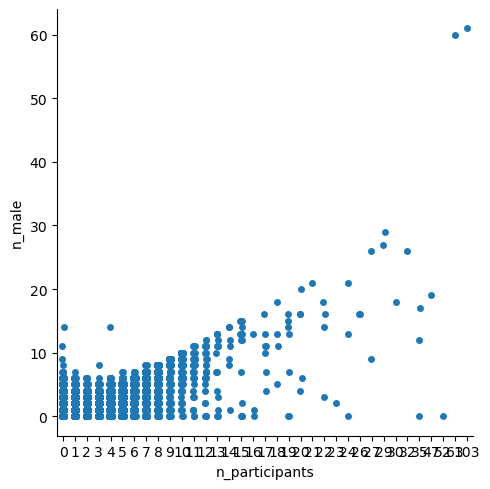

In [39]:
dist2 = sns.catplot(x = 'n_participants', y = 'n_male', data = df)

In [40]:
dist2.figure.savefig(os.path.join(path2, '04 Analysis','Visualizations', 'dist2.png'))

#### 7. Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far

([<matplotlib.axis.XTick at 0x2af8c312310>,
 [Text(0, 0, 'Sunday'),
  Text(1, 0, 'Monday'),
  Text(2, 0, 'Tuesday'),
  Text(3, 0, 'Wednesday'),
  Text(4, 0, 'Thursday'),
  Text(5, 0, 'Friday'),
  Text(6, 0, 'Saturday')])

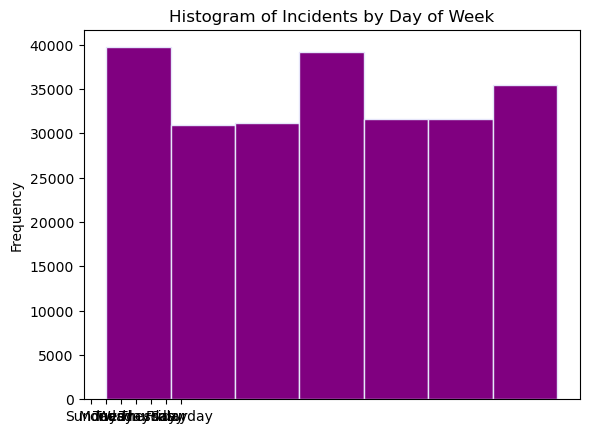

In [38]:
# Busiest day of week
days_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

barchart_busiest_days = df['day'].plot.hist(bins=7, color='purple', edgecolor='lavender')
plt.title('Histogram of Incidents by Day of Week')
plt.ylabel('Frequency')
#plt.xticks(np.arange(0, 7, 1))
plt.xticks(np.arange(0, 7), days_names)

([<matplotlib.axis.XTick at 0x2aa3cc21a50>,
 [Text(0, 0, 'Jan'),
  Text(1, 0, 'Feb'),
  Text(2, 0, 'Mar'),
  Text(3, 0, 'Apr'),
  Text(4, 0, 'May'),
  Text(5, 0, 'Jun'),
  Text(6, 0, 'Jul'),
  Text(7, 0, 'Aug'),
  Text(8, 0, 'Sep'),
  Text(9, 0, 'Oct'),
  Text(10, 0, 'Nov'),
  Text(11, 0, 'Dec')])

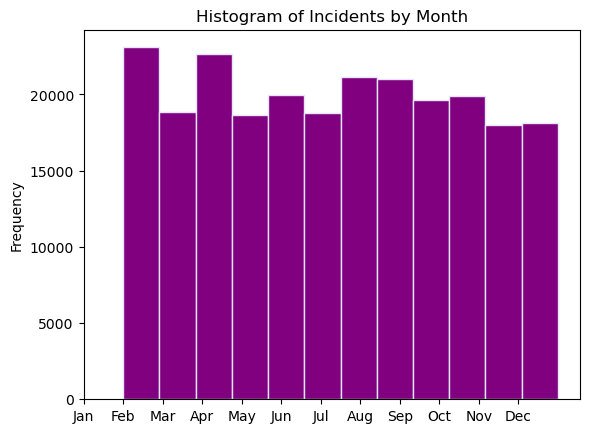

In [4]:
# Busiest day of week
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

barchart_busiest_months = df['month'].plot.hist(bins=12, color='purple', edgecolor='lavender')
plt.title('Histogram of Incidents by Month')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 12), month_names)


###### Sundays and Wednesdays are the days of the week with more incidents

#### 8. Define any hypotheses that you can at this point

###### I cannot define a hypothesis yet

#### 9. Save changes

In [58]:
df.to_csv('gun_violence_ex2.csv')